In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
dataset=pd.read_csv("AB_NYC_2019.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)

In [6]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
dataset.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:>

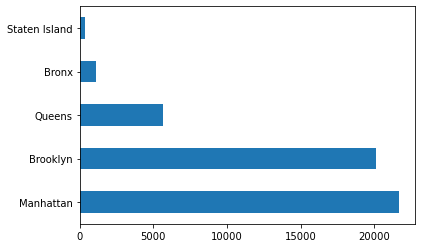

In [8]:
dataset['neighbourhood_group'].value_counts().plot(kind='barh')

In [9]:
dataset.room_type.unique()




array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
dataset.neighbourhood.nunique()

221

In [11]:
area_1=dataset.loc[dataset['neighbourhood_group'] == 'Brooklyn']
price_area1=area_1[['price']]

area_2=dataset.loc[dataset['neighbourhood_group'] == 'Manhattan']
price_area2=area_2[['price']]

area_3=dataset.loc[dataset['neighbourhood_group'] == 'Queens']
price_area3=area_3[['price']]

area_4=dataset.loc[dataset['neighbourhood_group'] == 'Staten Island']
price_sub4=area_4[['price']]

area_5=dataset.loc[dataset['neighbourhood_group'] == 'Bronx']
price_sub5=area_5[['price']]

In [12]:
busiest_hosts=dataset.host_id.value_counts().head(10)
busiest_hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [13]:
df_of_busiest_hosts=pd.DataFrame(busiest_hosts)
df_of_busiest_hosts.reset_index(inplace=True)
df_of_busiest_hosts.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
df_of_busiest_hosts

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [14]:
l=[]
for item in dataset.host_id.value_counts().head(10).index:
    l.append(item)
len(l)

10

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

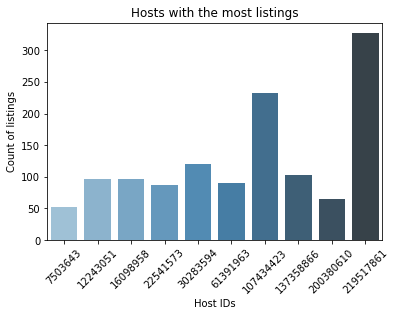

In [15]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=df_of_busiest_hosts,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

*******************************************************************
*******************************************************************
*******************************************************************
*******************************************************************
*******************************************************************

QUESTION 1:
null hypothesis: Mean of prices in Manhattan is equal to  population mean.\
H1             : Mean of prices in Manhattan is not equal to  population mean

In [16]:
from scipy import stats
pop_mean=dataset["price"].mean()

pop_mode=dataset["price"].mode()

pop_median=dataset["price"].median()
pop_std=dataset["price"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

106.0
152.7206871868289
0    100
dtype: int64
240.15416974718727


In [17]:
area_2=dataset.loc[dataset['neighbourhood_group'] == 'Manhattan']
price_area2=area_2[['price']]
Manhattan_mean=price_area2.mean()
Manhattan_mean

price    196.875814
dtype: float64

In [18]:
dataset_filtered=dataset.drop(dataset[dataset["price"] == 0].index)

In [19]:
dataset_filtered=dataset_filtered.drop(dataset_filtered[dataset_filtered["price"] >1000].index)

In [20]:
dataset_filtered[dataset_filtered["price"]== 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [21]:
dataset_filtered["log_of_price"]=np.log2(dataset_filtered["price"])

In [22]:
pop_mean=dataset_filtered["log_of_price"].mean()

pop_mode=dataset_filtered["log_of_price"].mode()

pop_median=dataset_filtered["log_of_price"].median()
pop_std=dataset_filtered["log_of_price"].std()
print(pop_median)

print(pop_mean)
print(pop_std)
print(pop_mode)


6.714245517666122
6.799098301294146
0.9643420648690121
0    6.643856
dtype: float64


T test bellow with p-value<0.05 rejects our null hypothesis so H1 is true.

In [23]:
import scipy as sp
from scipy import stats
st , p=sp.stats.ttest_1samp(dataset_filtered["log_of_price"], 7.62114207823, axis=0, nan_policy='propagate', alternative='two-sided')
print(st)
print(p)

-188.01086114567892
0.0


QUESTION 2:
null hypothesis:mean of prices of Entire room is equal to others\
H1             :mean of prices of Entire room is not  equal to others

In [24]:
segment=dataset_filtered.loc[dataset['room_type'] == 'Entire home/apt']
price_segment=segment[['price']]
price_mean=price_segment.mean()
price_mean

price    194.612429
dtype: float64

T test bellow with p-value<0.05 rejects our null hypothesis so H1 is true.

In [25]:
st , p=sp.stats.ttest_1samp(dataset_filtered["log_of_price"], 7.72109918871
, axis=0, nan_policy='propagate', alternative='two-sided')
print(st)
print(p)

-210.87220131539527
0.0


QUESTION 3:chi-2\
null hypothesis:there is no relation between room_type and neighbourhood_group.'\
H1             :there is a relation between room_type and neighbourhood_group. 

In [26]:
data_crosstab = pd.crosstab(dataset['room_type'], dataset['neighbourhood_group'], margins = False)                          
#contingency table                                                           
print(data_crosstab)

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        379      9559      13199    2096            176
Private room           652     10132       7982    3372            188
Shared room             60       413        480     198              9


In [27]:
from scipy.stats import chi2_contingency

# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.000
Variables are associated (reject H0)


QUESTION 4:
There are higher number of reviews of cheaper options than others

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

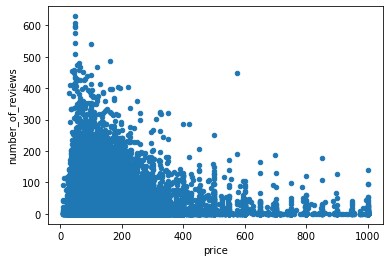

In [28]:
dataset_filtered.plot.scatter(x="price", y ="number_of_reviews" )

In [29]:
dataset["name_length"]=dataset['name'].map(str).apply(len)

QUESTION 5:
Is there any relation between number of reviews and length of name(the more the number of reviews,the more people lived there)


In [30]:
from scipy.stats.stats import pearsonr
x=dataset["name_length"].to_numpy()

y=dataset["number_of_reviews"].to_numpy()

sp.stats.pearsonr(x, y)


(-0.012441326903307851, 0.005939751439649556)

Pearson’s correlation coefficient is -0.012441326903307851,so no correlation is observed.

In [31]:
from scipy.stats.stats import pearsonr
x=dataset["availability_365"].to_numpy()

y=dataset["number_of_reviews"].to_numpy()

sp.stats.pearsonr(x, y)


(0.1720275814629295, 2.43e-321)